# Importing necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing dataset

In [74]:
data = pd.read_csv(r"C:\Users\HP\Downloads\UberDataset.csv")

# exploration of our data

In [75]:
data.head(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies


In [3]:
data.shape

(1156, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
data.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [10]:
# there seems so many null values in PURPOSE columns so we gonna fill them

data.fillna(data['PURPOSE'],inplace = True)


In [11]:
data.isnull().sum()

# so the null values has been replaced

START_DATE    0
END_DATE      1
CATEGORY      1
START         1
STOP          1
MILES         0
PURPOSE       0
dtype: int64

In [24]:
# changing the columns into date format for further anaylsis

data['START_DATE'] = pd.to_datetime(data['START_DATE'], errors='coerce')
data['END_DATE'] = pd.to_datetime(data['END_DATE'], errors='coerce')

In [15]:
from datetime import datetime

In [25]:
# Splitting the START_DATE to date and time column and then converting ..
# .. the time into four different categories i.e. Morning, Afternoon, Evening, Night



data['date'] = pd.DatetimeIndex(data['START_DATE']).date
data['time'] = pd.DatetimeIndex(data['START_DATE']).hour

#changing into categories of day and night
data['day-night'] = pd.cut(x=data['time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])

In [26]:
data.dropna(inplace= True)

# Once we are done with creating new columns, we can now drop rows with null values

In [27]:
data.drop_duplicates(inplace=True)

In [ ]:
# Now, we will be using matplotlib and seaborn library for visualising columns.

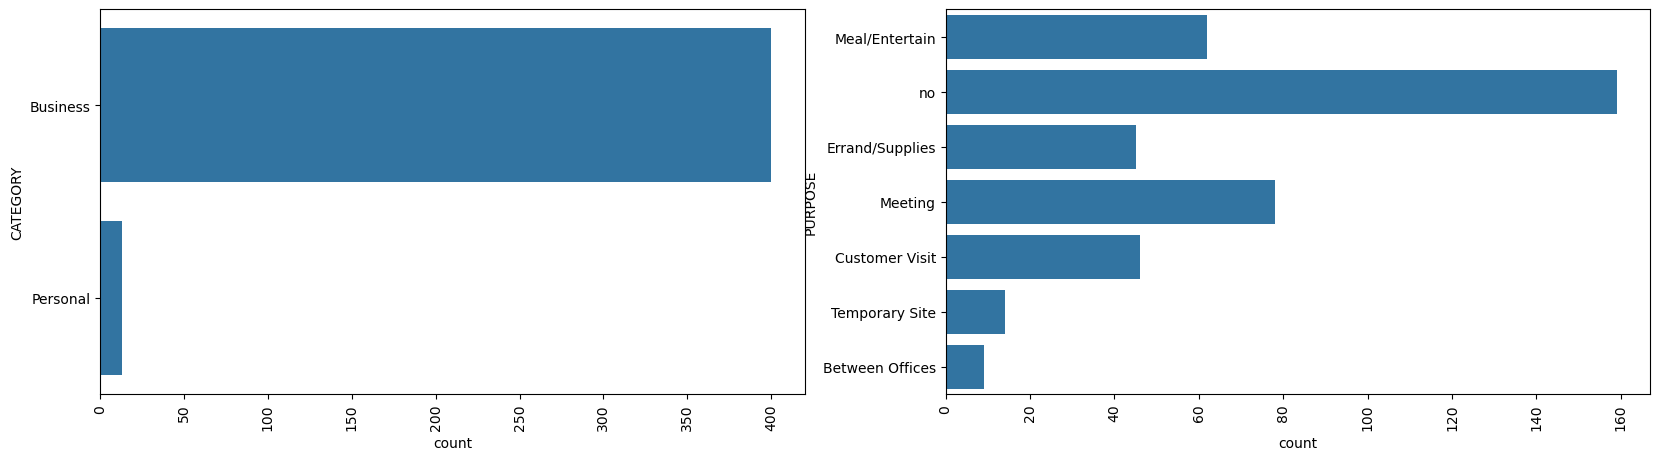

In [64]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.countplot(data['CATEGORY'])
plt.xticks(rotation = 90)


plt.subplot(1,2,2)
sns.countplot(data['PURPOSE'])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Let's do the same for time column

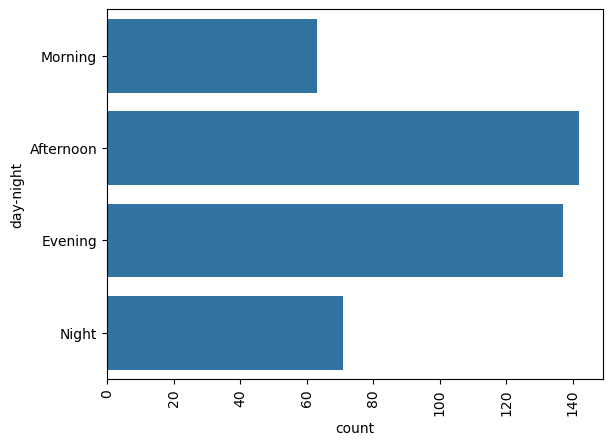

In [61]:
sns.countplot(data['day-night'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# now, we will be comparing the two different categories along with the PURPOSE of the us

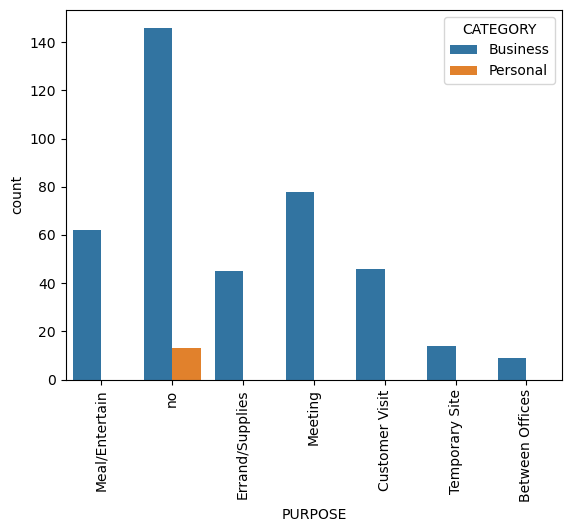

In [66]:
sns.countplot(x = 'PURPOSE',data = data, hue = 'CATEGORY')
plt.xticks(rotation =90)
plt.show()

In [ ]:
Insights from the above count-plots : 
1.  Most of the rides are booked for business purpose.
2.  Most of the people book cabs for Meetings and Meal / Entertain purpose.
3.  Most of the cabs are booked in the time duration of 10am-5pm (Afternoon).

In [ ]:
# Now, as we need to visualize the month data...

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

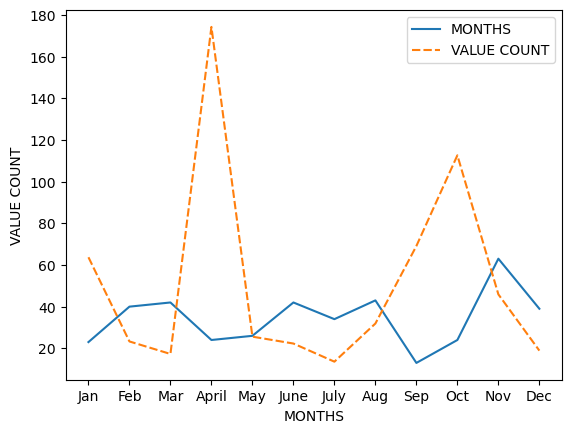

In [68]:
data['MONTH'] = pd.DatetimeIndex(data['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
data["MONTH"] = data.MONTH.map(month_label)

mon = data.MONTH.value_counts(sort=False)

# Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": mon.values,
                   "VALUE COUNT": data.groupby('MONTH',
                                                  sort=False)['MILES'].max()})

p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")

In [ ]:
# nsights from the above plot : 
# The counts are very irregular.
# Still its very clear that the counts are very less during Nov, Dec, Jan,

In [ ]:
# Now, let's explore the MILES Column

<Axes: ylabel='MILES'>

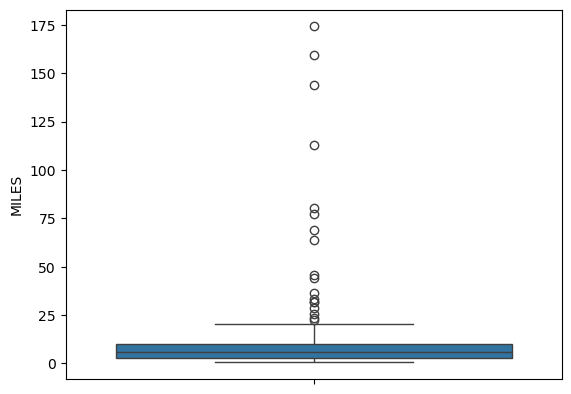

In [69]:
sns.boxplot(data['MILES'])

<Axes: ylabel='MILES'>

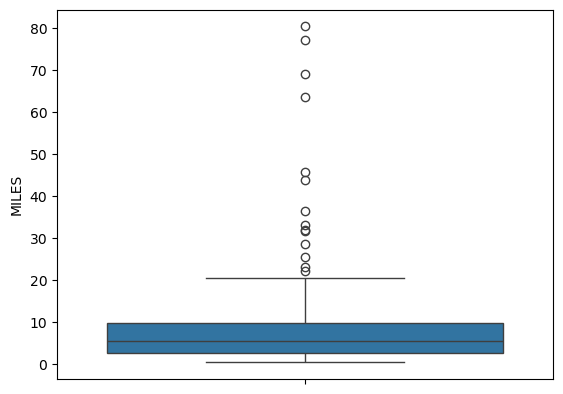

In [71]:
sns.boxplot(data[data['MILES']<100]['MILES'])

C:\Users\HP\AppData\Local\Temp\ipykernel_16468\1450821616.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

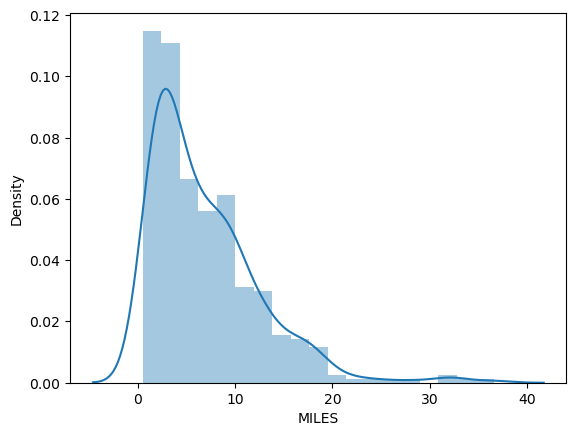

In [73]:
sns.distplot(data[data['MILES']<40]['MILES'])

In [ ]:
Insights from the above plots :
1.  Most of the cabs booked for the distance of 4-5 miles.
2.  Majorly people chooses cabs for the distance of 0-20 miles.
3.  For distance more than 20 miles cab counts is nearly negligible.